(10000, 3072)


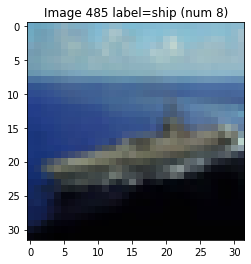

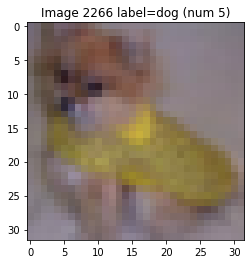

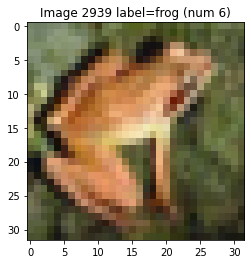

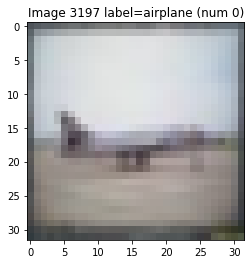

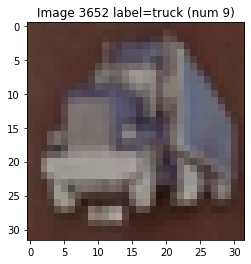

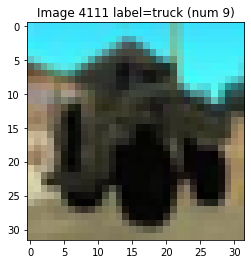

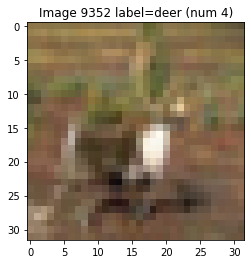

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
1. Testing Accuracy of function  1. 'class_acc':  100.0 %
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
2.  Accuracy of function 2 'cifar10_classifier_random':  9.964 %
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


IndexError: list index out of range

In [2]:
### 1. Loading Dataset and Plotting images

import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random
#import random

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

datadict = unpickle('cifar-10-batches-py/data_batch_1')

X = datadict["data"]
Y = datadict["labels"]

print(X.shape)

labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

for i in range(X.shape[0]):
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)


# 2. Write a python function class_acc(pred, gt) that computes the classification accuracy for predicted labels 

def class_acc(pred, gt):
    accurate = 0
    for i in range(len(gt)):
        if pred[i] == gt[i]:
            accurate = accurate + 1
    length_gt = float(len(gt))
    return (accurate / length_gt )* 100.0

# 3. Write a function cifar10_classifier_random(x) that returns a random class label for the input data x. 

import random
def cifar10_classifier_random(data):
    list_random = []
   
    for i in range(data.shape[0]):
        num = random.randint(0, 9)
        list_random.append(num)
    return np.array(list_random)


# 4.Write a function cifar10_classifier_1nn(x, trdata, trlabels) that finds the best match of the input vector x in the training set trdata and returns the same label. 


def cifar10_classifier_1nn(x, trdata, trlabels):
    size_trdata = len(trdata)
    distance = np.zeros(size_trdata)
    size = len(trdata)
    for i in range(0, size):
        distance[i] = np.sum(np.subtract(trdata[i], x) ** 2)
    label_test = trlabels[distance.argmin()]
    return label_test 



#5.  Evaluating Classification 


Training_files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
size_Training_files = len(Training_files)
data_img = []
labels_img = []
for i in range(size_Training_files):
    raw_data = unpickle('cifar-10-batches-py/' + Training_files[i])
    data_img.append(raw_data["data"])
    labels_img.append(raw_data["labels"])
train_images = np.concatenate(data_img)
train_images = train_images.astype('int32')
train_classes = np.concatenate(labels_img)
label_dictionary = unpickle('cifar-10-batches-py/batches.meta')
label_names = label_dictionary["label_names"]


# Function 2 
# Checking accuracy of Function 'class_acc'
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
print("1. Testing Accuracy of function  1. 'class_acc': ",class_acc(train_classes, train_classes),'%')


# Function 3
# Accuracy of Function "cifar10_classifier_random"
pred_rand_classifier = cifar10_classifier_random(train_images)
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
accuracy_result_random = class_acc(pred_rand_classifier, train_classes)
print("2.  Accuracy of function 2 'cifar10_classifier_random': ",accuracy_result_random,'%')
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

# Function 4 
# cifar10_classifier_1nn
data_dictionary = unpickle('cifar-10-batches-py/test_batch')
images_X = datadict["data"]
labels_Y = datadict["labels"]
test_images = images_X
test_labels = np.array(labels_Y)
test_images = test_images.astype('int32')
label_dictionary= unpickle('cifar-10-batches-py/batches.meta')
label_names = label_dictionary["label_names"]


pred_label = []
for i in range(0, 10000):

    pred_label.append(cifar10_classifier_1nn(test_images[i], train_images, train_classes))
    
accuracy_result_1nn = class_acc(pred_label, test_labels)
print("3.  Accuracy of function 3 'cifar10_classifier_1nn': ",accuracy_result_1nn,'%')

